# **Homework 1 Question 2**
**Submitted by: Jaya Sandeep, Ketha**

Importing all necessary libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold, learning_curve, cross_validate
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import numpy as np
from sklearn.linear_model import Ridge, Lasso, ElasticNet, SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

import numpy as np
from sklearn.datasets import make_regression
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from pandas.plotting import scatter_matrix
from sklearn.compose import ColumnTransformer

Reading data

In [2]:
path = "/content/cubic_zirconia.csv"
gem_data = pd.read_csv(path)
gem_data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


**The data consists of the following attributes:**

**1. Carat:** In the context of gemstones, a "carat" is a unit of measurement used to express the weight of a gemstone. One carat is equivalent to 200 milligrams or 0.007 ounces. It's important to note that carat weight is a measure of a gemstone's size and not necessarily its quality or value. Other factors such as color, clarity, and cut also play significant roles in determining the overall quality and value of a gemstone.

**2. Cut**:  The "cut" refers to how a gemstone has been shaped and faceted by a skilled gem cutter. The cut is one of the "Four Cs" used to assess the quality and value of a gemstone, with the other three being carat weight, color, and clarity. The cut has a significant impact on the gemstone's overall appearance and brilliance.

**3. Color:** Color is one of the most important factors in determining the quality and value of gemstones. The color of a gemstone is influenced by the presence of specific chemical elements, impurities, and the crystal structure of the mineral.

**4. Clarity:** Clarity is a critical factor in assessing the quality and value of gemstones, particularly in the case of transparent or translucent gemstones. Clarity refers to the presence or absence of internal or external imperfections, which are often called "inclusions" and "blemishes," respectively. These imperfections can affect a gemstone's overall appearance and transparency. Gemstone clarity is evaluated using a grading system, and the level of clarity can significantly impact the gem's value.

**5. Depth:** Depth, in the context of gemstones, refers to the measurement of a gemstone's height or thickness from the culet (the bottom of a faceted gemstone) to the table (the flat top surface of the gem). The depth percentage, often expressed as a percentage of the gem's overall width (or diameter), is an important factor in assessing the quality and appearance of a faceted gemstone.
The height of cubic zirconia, measured from the Culet to the table, divided by its average Girdle diameter.

**6. Table:** In gemology, the "table" refers to the flat, topmost facet of a faceted gemstone, which is typically the largest facet on the gem's crown (the upper part of the gem above the girdle). The table facet is an important element in the overall cut of the gem and plays a significant role in how the gemstone interacts with light.
The width of the cubic zirconia's table expressed as a percentage of its average diameter.

**7. Length:** The length of a gemstone refers to the measurement taken from one end of the gem to the other along its longest dimension. This measurement is typically taken from one end of the gem to the opposite end in a straight line.

**8. Width:** The width of a gemstone refers to the measurement taken from one side of the gem to the other side, perpendicular to the length. It is typically taken from one side to the opposite side in a straight line, crossing the midpoint of the gem.

**9. Height:** The height of a gemstone, also known as the depth, refers to the measurement taken from the top (table) of the gem to the bottom (culet) in a vertical direction, parallel to the length and width. This measurement is crucial in determining the overall depth and proportions of the gem.

**10. Price:** Price of Zirconia gemstone.

In [3]:
# Rename columns
gem_data.rename(columns={'carat': 'Carat', 'cut': 'Cut','color': 'Color', 'clarity': 'Clarity','depth': 'Depth_percent', 'table': 'Table_percent','x': 'Length', 'y': 'Width', 'z': 'Height', 'price': 'Price'}, inplace=True)

# **Question - A:**

In [4]:
# Get the size of the DataFrame
num_rows, num_columns = gem_data.shape

# Print the size
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 26967
Number of columns: 11


In [5]:
gem_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     26967 non-null  int64  
 1   Carat          26967 non-null  float64
 2   Cut            26967 non-null  object 
 3   Color          26967 non-null  object 
 4   Clarity        26967 non-null  object 
 5   Depth_percent  26270 non-null  float64
 6   Table_percent  26967 non-null  float64
 7   Length         26967 non-null  float64
 8   Width          26967 non-null  float64
 9   Height         26967 non-null  float64
 10  Price          26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


The available data has a total of 26967 rows and 11 columns, out of which one column (Unnamed) is redundant and it will be dropped in the data cleaning section.

In the data, there are 7 continous values (float and int values) namely Carat, Depth_percent, Table_percent, Length, Width, Height and Price.
There are 3 categorical values (Cut, Color and Clarity) and the categorical values are explored below.

In [6]:
# Check unique values in 'Cut Column'
unique_values_cut = gem_data['Cut'].unique()
print("Unique values in Cut column:", unique_values_cut)

# Check unique values in 'Color Column'
unique_values_color = gem_data['Color'].unique()
print("Unique values in Color column:", unique_values_color)

# Check unique values in 'Clarity Column'
unique_values_clarity = gem_data['Clarity'].unique()
print("Unique values in Clarity column:", unique_values_clarity)

Unique values in Cut column: ['Ideal' 'Premium' 'Very Good' 'Good' 'Fair']
Unique values in Color column: ['E' 'G' 'F' 'D' 'H' 'J' 'I']
Unique values in Clarity column: ['SI1' 'IF' 'VVS2' 'VS1' 'VVS1' 'VS2' 'SI2' 'I1']


**Unique values in Cut:** Quality is in increasing order - Fair, Good, Very Good, Premium, Ideal.

**Unique values in Color:** ***D*** being the best and ***J*** being the worst.

**Unique values in Clarity:** ***FL*** being the best and ***I3*** being the worst.
1652905572-d-clarity-chart.avif

# **Question - B**

## **DATA CLEANING AND EXPLORATORY DATA ANALYSIS**

In [7]:
#Drop unnecessery columns
gem_data.drop("Unnamed: 0", axis = 1, inplace = True)

In [8]:
# Count and print the number of null values in each column
null_counts = gem_data.isnull().sum()
print("Number of null values in each column:")
print(null_counts)

Number of null values in each column:
Carat              0
Cut                0
Color              0
Clarity            0
Depth_percent    697
Table_percent      0
Length             0
Width              0
Height             0
Price              0
dtype: int64


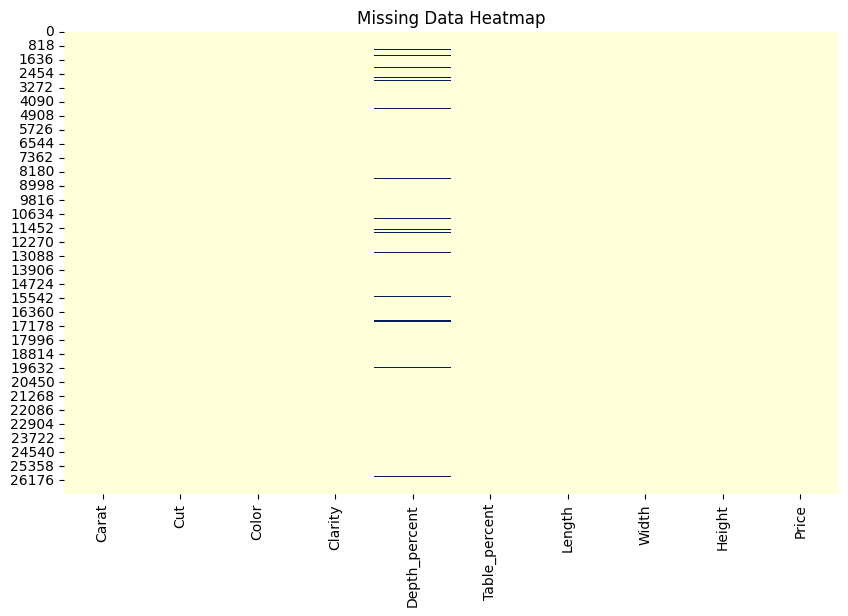

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a missing data heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(gem_data.isnull(), cbar=False, cmap='YlGnBu')
plt.title('Missing Data Heatmap')
plt.show()

In [10]:
import pandas as pd

# Create a summary table of missing values
missing_data_summary = pd.DataFrame({
    'Feature': gem_data.columns,
    'Missing Values': gem_data.isnull().sum(),
    'Percentage Missing': (gem_data.isnull().sum() / len(gem_data)) * 100
})

# Sort the table by percentage missing values
missing_data_summary = missing_data_summary.sort_values(by='Percentage Missing', ascending=False)

# Display the summary table
print(missing_data_summary)

                     Feature  Missing Values  Percentage Missing
Depth_percent  Depth_percent             697             2.58464
Carat                  Carat               0             0.00000
Cut                      Cut               0             0.00000
Color                  Color               0             0.00000
Clarity              Clarity               0             0.00000
Table_percent  Table_percent               0             0.00000
Length                Length               0             0.00000
Width                  Width               0             0.00000
Height                Height               0             0.00000
Price                  Price               0             0.00000


Since, the percentage of missing values is only 2.58% and we require all data points for further analysis. So we treat the null values by replacing them with the median of the Depth_percent feature.

In [11]:
median = gem_data["Depth_percent"].median()
gem_data["Depth_percent"].fillna(median, inplace=True)

In [12]:
gem_data.describe()

,Carat,Depth_percent,Table_percent,Length,Width,Height,Price
count,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
mean,0.798375,61.746564,57.456080,5.729854,5.733569,3.538057,3939.518115
std,0.477745,1.394509,2.232068,1.128516,1.166058,0.720624,4024.864666
min,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.100000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000
max,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


**Histograms**

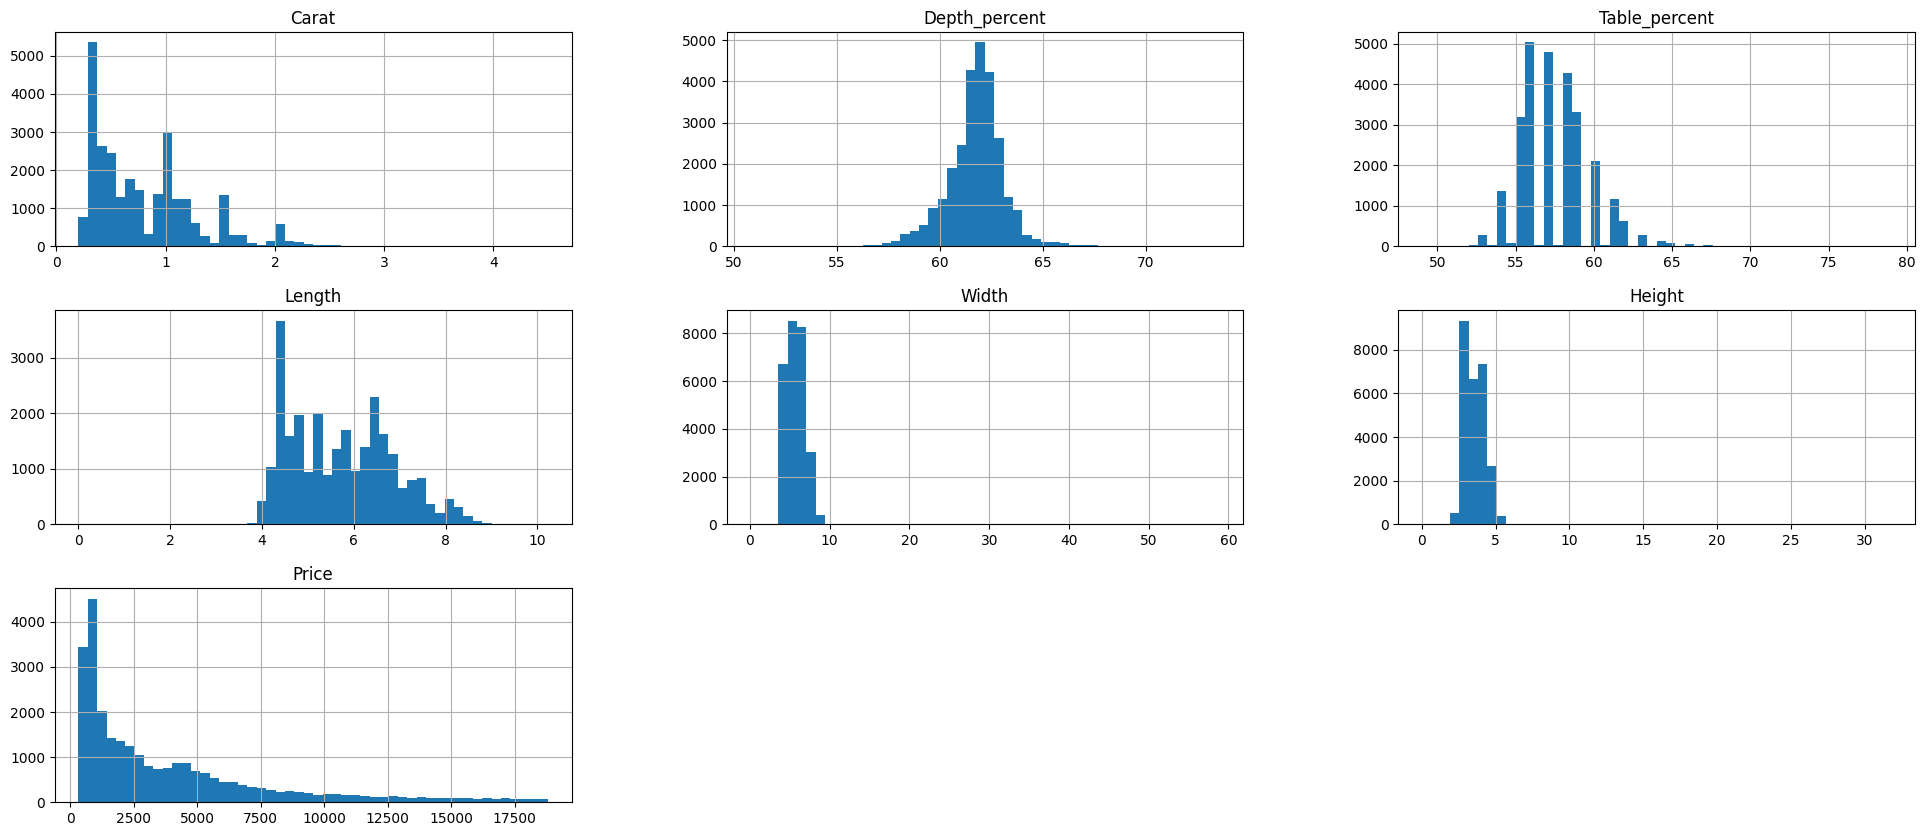

In [13]:
gem_data.hist(bins=50, figsize=(24,10))
plt.show()

**Box Plot to identify distribution**

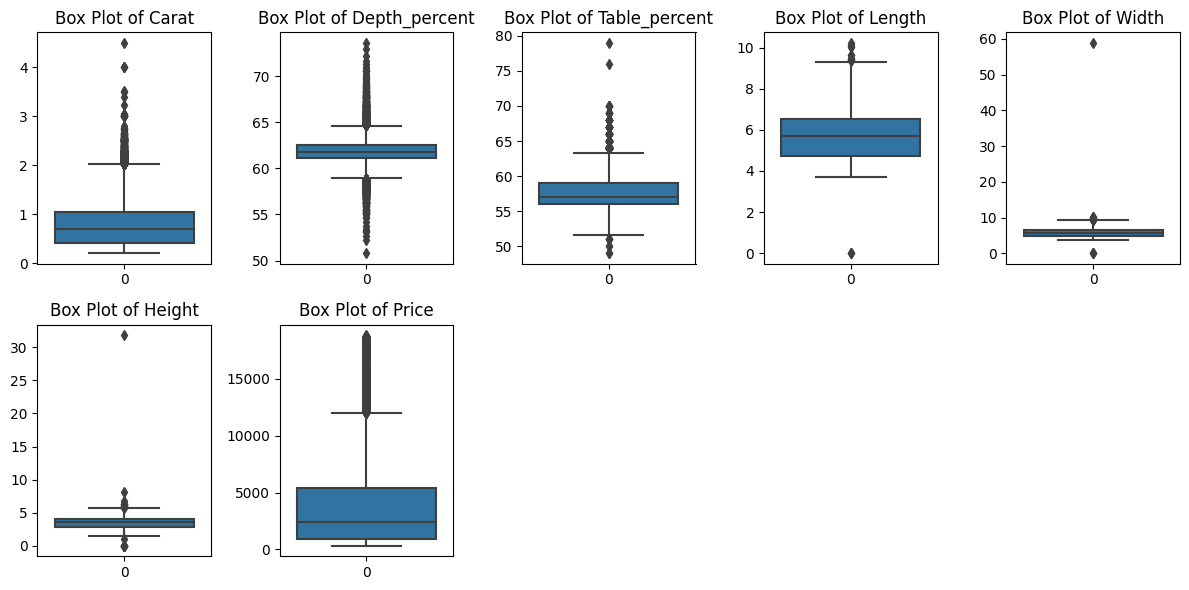

Number of outliers in Carat: 662
Number of outliers in Depth_percent: 1419
Number of outliers in Table_percent: 318
Number of outliers in Length: 15
Number of outliers in Width: 15
Number of outliers in Height: 23
Number of outliers in Price: 1779


In [14]:
# Select numeric columns (excluding object/string columns)
numeric_columns = gem_data.select_dtypes(include=[int, float])

# Create box plots and count outliers
plt.figure(figsize=(12, 6))
outlier_counts = []

for i, column in enumerate(numeric_columns.columns, 1):
    plt.subplot(2, 5, i)  # Create a grid of subplots (adjust the numbers for layout)

    # Create the box plot
    sns.boxplot(data=numeric_columns[column])
    plt.title(f'Box Plot of {column}')

    # Count outliers using the IQR method
    q1 = numeric_columns[column].quantile(0.25)
    q3 = numeric_columns[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = numeric_columns[(numeric_columns[column] < lower_bound) | (numeric_columns[column] > upper_bound)]
    outlier_count = outliers.shape[0]
    outlier_counts.append(outlier_count)

plt.tight_layout()  # Adjust subplot layout
plt.show()

# Print the number of outliers for each column
for i, column in enumerate(numeric_columns.columns):
    print(f'Number of outliers in {column}: {outlier_counts[i]}')

,Column,Range,Variance,Standard Deviation,Skewness,Potential Outliers,Percent Outliers
0,Carat,4.30,2.282407e-01,0.477745,1.116481,662,2.454852
1,Depth_percent,22.80,1.944654e+00,1.394509,-0.032042,1419,5.261987
2,Table_percent,30.00,4.982127e+00,2.232068,0.765758,318,1.179219
3,Length,10.23,1.273549e+00,1.128516,0.387986,15,0.055624
4,Width,58.90,1.359690e+00,1.166058,3.850189,15,0.055624
5,Height,31.80,5.192984e-01,0.720624,2.568257,23,0.085289
6,Price,18492.00,1.619954e+07,4024.864666,1.618550,1779,6.596952


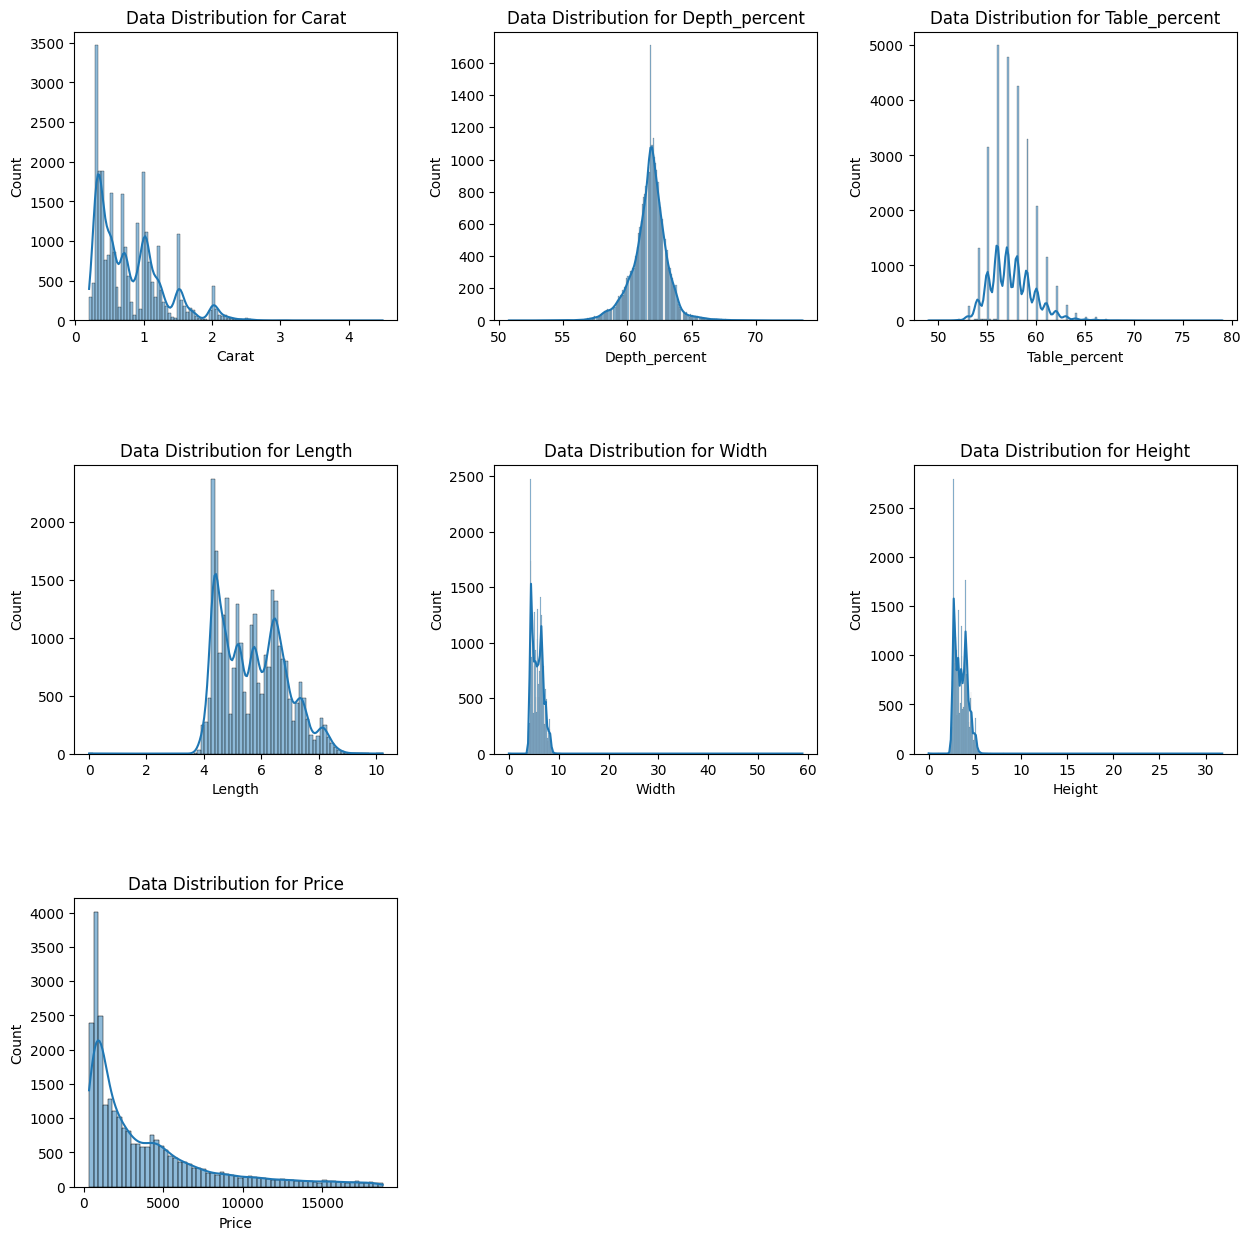

In [15]:
df = gem_data

# Identify numeric columns
numeric_columns = df.select_dtypes(include=[int, float])

# Create subplots for all numeric columns
num_cols_count = len(numeric_columns.columns)
cols_per_subplot = 3  # Adjust the number of columns per subplot as needed
num_subplots = (num_cols_count + cols_per_subplot - 1) // cols_per_subplot

# Initialize a list to store results for each numeric column
results = []

# Loop through each numeric column and analyze
for column in numeric_columns.columns:
    result = {}

    # 1. Spread (Variability)
    range_val = df[column].max() - df[column].min()
    variance = df[column].var()
    std_deviation = df[column].std()

    # 2. Skewness
    skewness = df[column].skew()

    # 3. Outliers
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1

    # Identify potential outliers using IQR method
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    potential_outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]


    # Calculate the percentage of outliers
    percent_outliers = (potential_outliers.shape[0] / df.shape[0]) * 100

    result['Column'] = column
    result['Range'] = range_val
    result['Variance'] = variance
    result['Standard Deviation'] = std_deviation
    result['Skewness'] = skewness
    result['Potential Outliers'] = potential_outliers.shape[0]
    result['Percent Outliers'] = percent_outliers
    results.append(result)


# Create a DataFrame from the results list
results_df = pd.DataFrame(results)
display(results_df)


# Create subplots for data distribution histograms
fig, axes = plt.subplots(num_subplots, cols_per_subplot, figsize=(15, 5*num_subplots))
plt.subplots_adjust(wspace=0.3, hspace=0.5)  # Adjust subplot spacing

subplot_idx = 0

# Loop through each numeric column and create histograms
for column in numeric_columns.columns:
    ax = axes[subplot_idx // cols_per_subplot, subplot_idx % cols_per_subplot]

    sns.histplot(data=df, x=column, kde=True, ax=ax)
    ax.set_title(f'Data Distribution for {column}')

    subplot_idx += 1

# Hide empty subplots (if any)
for i in range(subplot_idx, num_subplots * cols_per_subplot):
    fig.delaxes(axes.flatten()[i])



# Show the subplots
plt.show()

**Value counts of categorical variables**

In [16]:
# Calculate the value counts
value_counts = gem_data['Cut'].value_counts()

# Calculate the percentage of counts
percent_counts = (value_counts / len(gem_data)) * 100

# Combine the counts and percentages into a DataFrame
count_df = pd.DataFrame({'Count': value_counts, 'Percent': percent_counts})

# Display the count and percentage DataFrame
print(count_df)

           Count    Percent
Ideal      10816  40.108280
Premium     6899  25.583120
Very Good   6030  22.360663
Good        2441   9.051804
Fair         781   2.896132


In [17]:
# Calculate the value counts
value_counts = gem_data['Color'].value_counts()

# Calculate the percentage of counts
percent_counts = (value_counts / len(gem_data)) * 100

# Combine the counts and percentages into a DataFrame
count_df = pd.DataFrame({'Count': value_counts, 'Percent': percent_counts})

# Sort the DataFrame by the index (categories)
count_df = count_df.sort_index()

# Display the count and percentage DataFrame
print(count_df)

   Count    Percent
D   3344  12.400341
E   4917  18.233396
F   4729  17.536248
G   5661  20.992324
H   4102  15.211184
I   2771  10.275522
J   1443   5.350985


In [18]:
# Calculate the value counts
value_counts = gem_data['Clarity'].value_counts()

# Calculate the percentage of counts
percent_counts = (value_counts / len(gem_data)) * 100

# Combine the counts and percentages into a DataFrame
count_df = pd.DataFrame({'Count': value_counts, 'Percent': percent_counts})

# Display the count and percentage DataFrame
print(count_df)

      Count    Percent
SI1    6571  24.366819
VS2    6099  22.616531
SI2    4575  16.965180
VS1    4093  15.177810
VVS2   2531   9.385545
VVS1   1839   6.819446
IF      894   3.315163
I1      365   1.353506


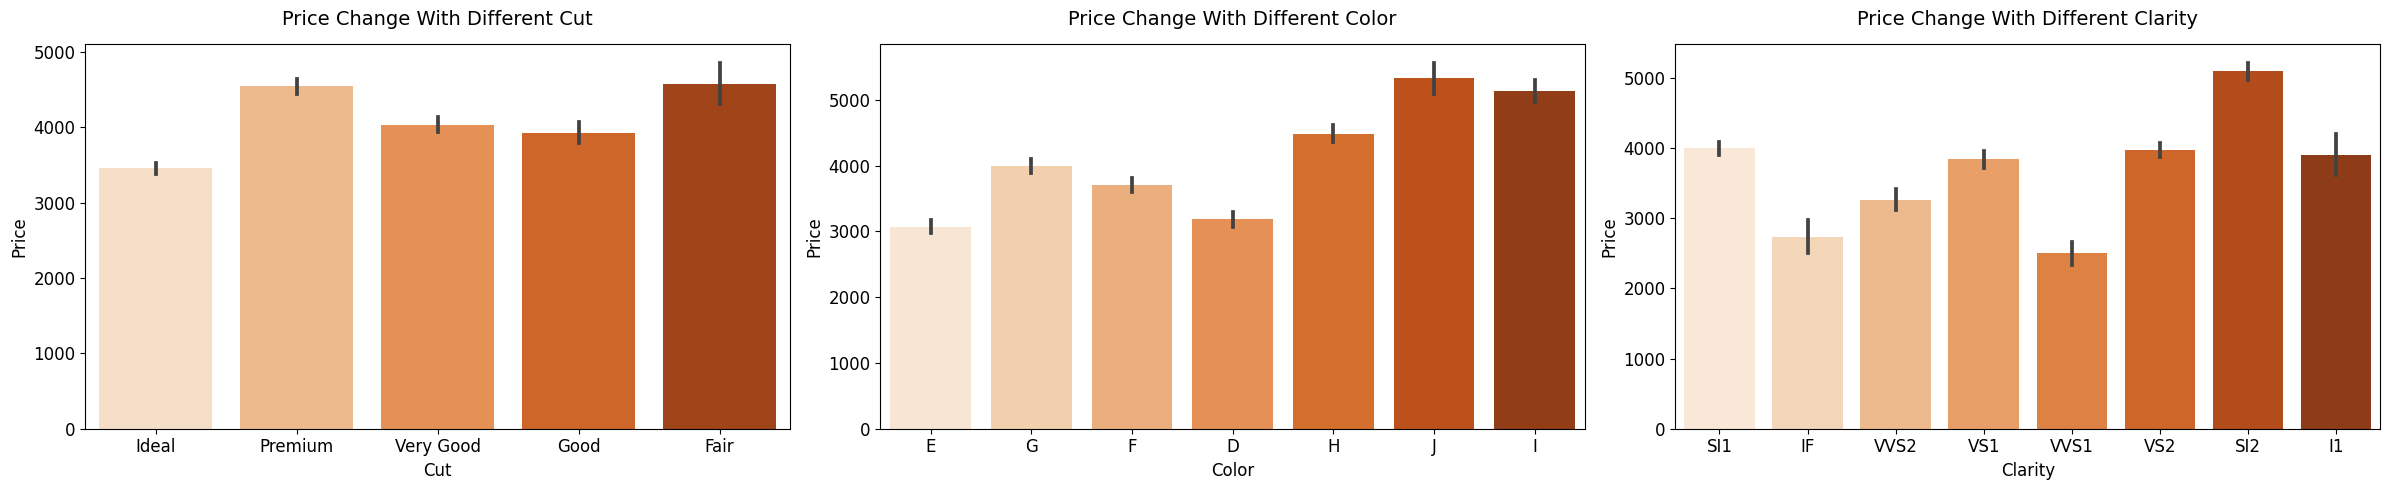

In [19]:
# Create a figure with three subplots in a single row
fig, axes = plt.subplots(1, 3, figsize=(24, 5))  # 1 row, 3 columns, adjust figsize as needed

# Plot the first barplot on the first subplot
sns.barplot(data=gem_data, x='Cut', y='Price', palette="Oranges", ax=axes[0])
axes[0].set_title("Price Change With Different Cut", fontsize=14, pad=14)
axes[0].set_xlabel('Cut', fontsize=12)
axes[0].set_ylabel('Price', fontsize=12)
axes[0].tick_params(axis='x', which='major', labelsize=12)
axes[0].tick_params(axis='y', which='major', labelsize=12)

# Plot the second barplot on the second subplot
sns.barplot(data=gem_data, x='Color', y='Price', palette="Oranges", ax=axes[1])
axes[1].set_title("Price Change With Different Color", fontsize=14, pad=14)
axes[1].set_xlabel('Color', fontsize=12)
axes[1].set_ylabel('Price', fontsize=12)
axes[1].tick_params(axis='x', which='major', labelsize=12)
axes[1].tick_params(axis='y', which='major', labelsize=12)

# Plot the third barplot on the third subplot
sns.barplot(data=gem_data, x='Clarity', y='Price', palette="Oranges", ax=axes[2])
axes[2].set_title("Price Change With Different Clarity", fontsize=14, pad=14)
axes[2].set_xlabel('Clarity', fontsize=12)
axes[2].set_ylabel('Price', fontsize=12)
axes[2].tick_params(axis='x', which='major', labelsize=12)
axes[2].tick_params(axis='y', which='major', labelsize=12)

# Adjust the layout to prevent overlap
plt.tight_layout()

# Show the subplots
plt.show()


* Premium and Fair Cut has highest Price.
* Color J has highest Price.
* S12 clarity has highest Price.


#**Question-C**

In [20]:
# Assuming 'df' is your DataFrame
numeric_columns = gem_data.select_dtypes(include=['float','int'])  # Select only numeric columns
correlation_matrix = numeric_columns.corr(method='pearson')

In [21]:
correlation_matrix["Price"].sort_values(ascending=False)

Price            1.000000
Carat            0.922416
Length           0.886247
Width            0.856243
Height           0.850536
Table_percent    0.126942
Depth_percent   -0.002519
Name: Price, dtype: float64

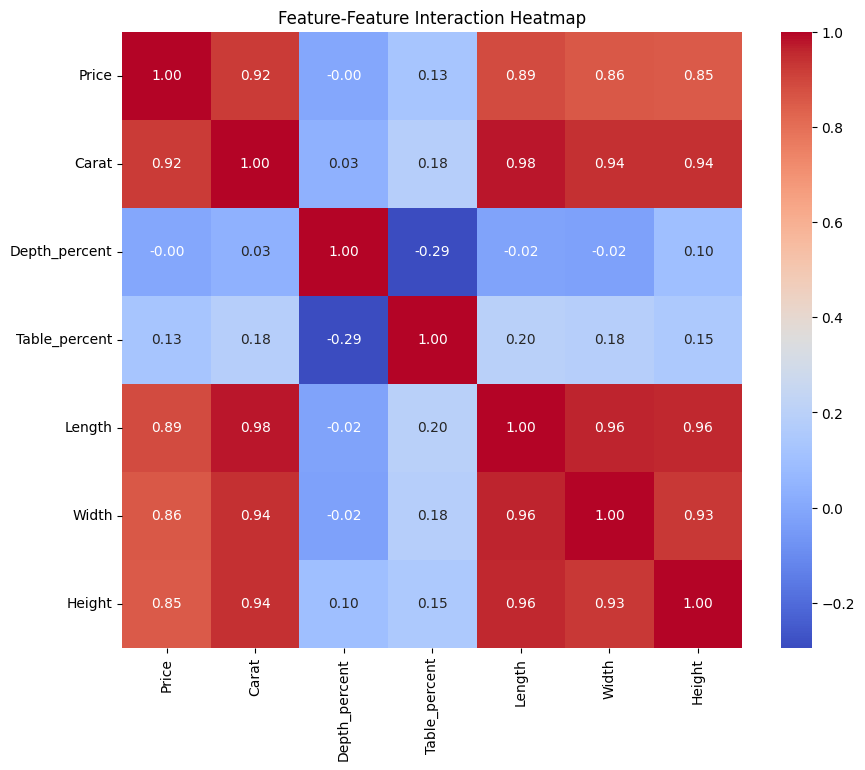

In [22]:
# Define the attributes for the scatter matrix
attributes = ["Price", "Carat", "Depth_percent", "Table_percent", "Length", "Width", "Height"]

# Create a heatmap of feature-feature interactions
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
corr_matrix = gem_data[attributes].corr()  # Calculate the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature-Feature Interaction Heatmap')
plt.show()

From the scatter plot and heat map, it is clear that Length, Width, and Height have high correlation values with respect to price. An interesting observation from Heatmap is that Length, Width, and Height have the highest correlation with each other. New features like surface area may give much more useful data.

In [23]:
gem_data['Surface_Area'] = 2 * (gem_data['Length'] * gem_data['Width'] + gem_data['Length'] * gem_data['Height'] + gem_data['Width'] * gem_data['Height'])

In [24]:
# Assuming 'df' is your DataFrame
numeric_columns = gem_data.select_dtypes(include=['float','int'])  # Select only numeric columns
correlation_matrix = numeric_columns.corr(method='pearson')
correlation_matrix["Price"].sort_values(ascending=False)

Price            1.000000
Carat            0.922416
Surface_Area     0.895134
Length           0.886247
Width            0.856243
Height           0.850536
Table_percent    0.126942
Depth_percent   -0.002519
Name: Price, dtype: float64

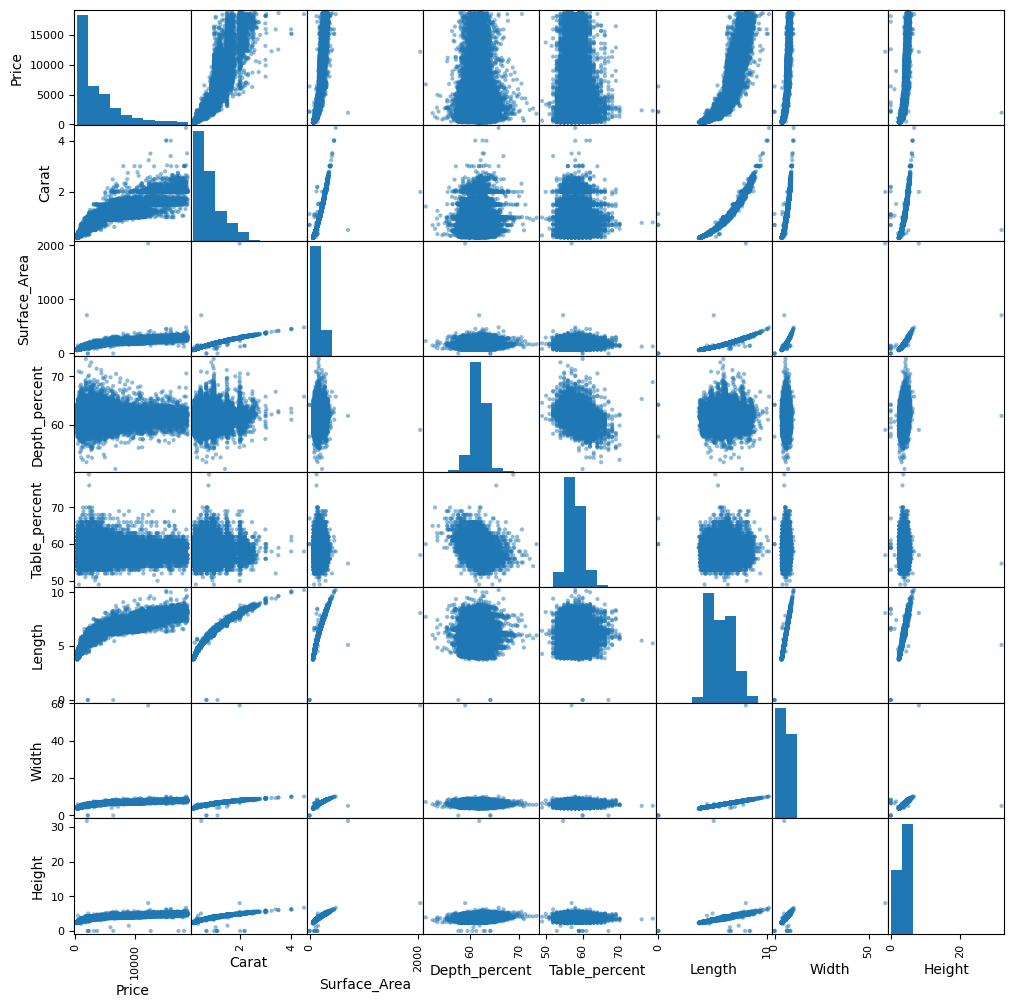

In [25]:
attributes = ["Price", "Carat", "Surface_Area", "Depth_percent", "Table_percent", "Length", "Width", "Height"]

# Create the scatter matrix plot
scatter_matrix(gem_data[attributes], figsize=(12, 12), alpha=0.5)

# Show the plot
plt.show()

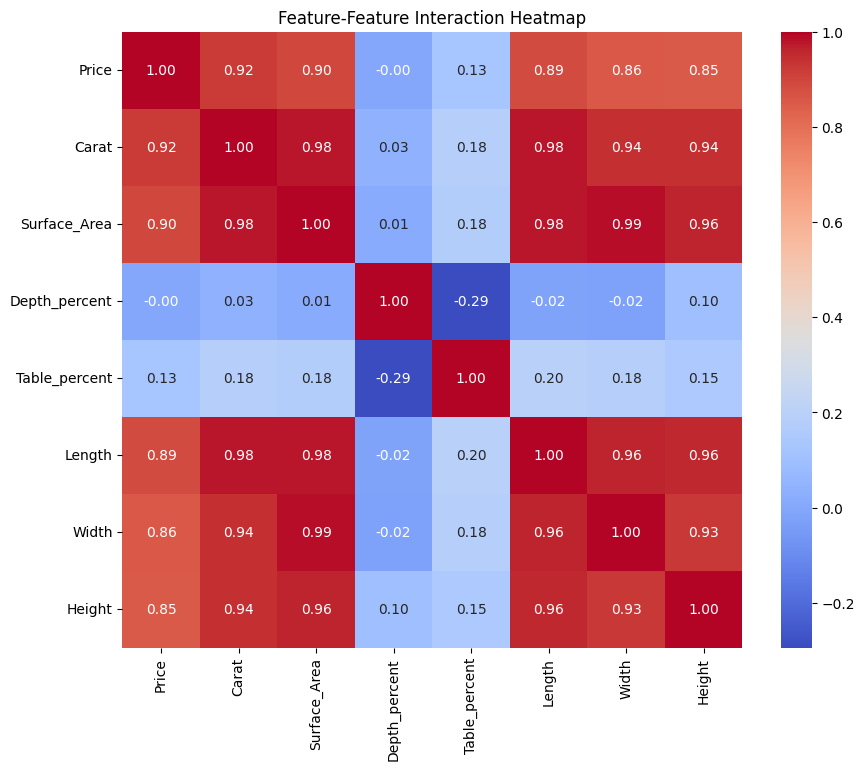

In [26]:
# Create a heatmap of feature-feature interactions
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
corr_matrix = gem_data[attributes].corr()  # Calculate the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature-Feature Interaction Heatmap')
plt.show()

## **Question-D**

<Axes: >

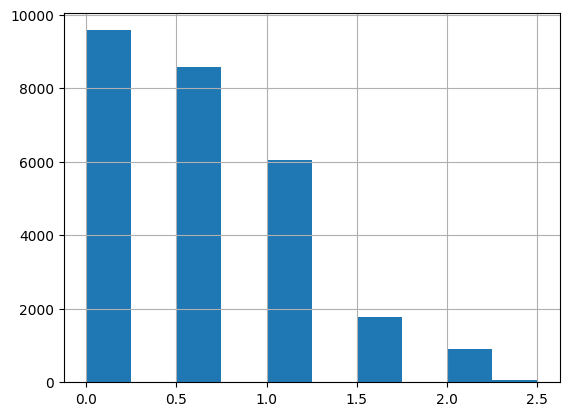

In [27]:
gem_data["Carat_Category"] = pd.cut(gem_data["Carat"],
                                   bins=[0., .5, 1., 1.5, 2., 2.5, np.inf],labels=[0, 0.5, 1, 1.5, 2, 2.5])

gem_data["Carat_Category"].hist()

In [28]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=18)
for train_index, test_index in split.split(gem_data, gem_data["Carat_Category"]):
        strat_train_set = gem_data.loc[train_index]
        strat_test_set = gem_data.loc[test_index]

In [29]:
print("strat_train_set shape:", strat_train_set.shape)
print("strat_test_set shape:", strat_test_set.shape)

strat_train_set shape: (21573, 12)
strat_test_set shape: (5394, 12)


In [30]:
strat_test_set["Carat_Category"].value_counts() / len(strat_test_set)

0.0    0.355395
0.5    0.318131
1.0    0.224509
1.5    0.065814
2.0    0.033556
2.5    0.002595
Name: Carat_Category, dtype: float64

In [31]:
# Combine the dataframes horizontally (side by side) for comparision
compare_df = pd.concat([gem_data['Carat'], strat_train_set['Carat'], strat_test_set['Carat']], axis=1)

# Print the combined dataframe
print(compare_df.describe())

              Carat         Carat        Carat
count  26967.000000  21573.000000  5394.000000
mean       0.798375      0.798622     0.797388
std        0.477745      0.478070     0.476489
min        0.200000      0.200000     0.200000
25%        0.400000      0.400000     0.390000
50%        0.700000      0.700000     0.700000
75%        1.050000      1.040000     1.050000
max        4.500000      4.500000     4.010000


In [32]:
# Combine the data frames horizontally (side by side) for comparison
compare_df = pd.concat([gem_data['Surface_Area'], strat_train_set['Surface_Area'], strat_test_set['Surface_Area']], axis=1)

# Print the combined dataframe
print(compare_df.describe())

       Surface_Area  Surface_Area  Surface_Area
count  26967.000000  21573.000000   5394.000000
mean     152.472018    152.513774    152.305016
std       61.180287     61.505497     59.867288
min        0.000000      0.000000     62.347000
25%       99.380800     99.495000     98.996050
50%      145.516000    145.575000    145.250500
75%      190.343500    190.221400    190.868150
max     2032.880800   2032.880800    454.589600


In [33]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("Carat_Category", axis=1, inplace=True)

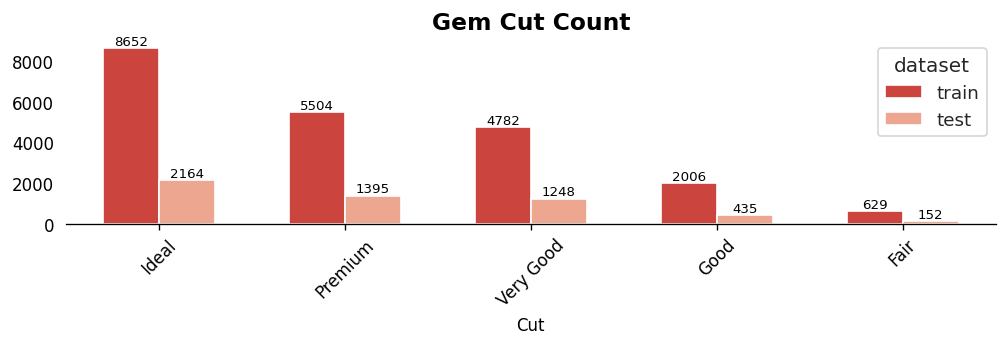

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already defined 'strat_train_set' and 'strat_test_set'

# Combine train and test datasets
strat_train_set['dataset'] = 'train'
strat_test_set['dataset'] = 'test'
train_test = pd.concat([strat_train_set, strat_test_set])

# Specify the category you want to visualize (e.g., 'Cut')
category = 'Cut'

# Create the figure and countplot
fig, ax = plt.subplots(figsize=(10, 2), dpi=120)
sns.set(style="whitegrid")  # Set the style if needed
s = sns.countplot(data=train_test, x=category, order=train_test[category].value_counts().index, hue='dataset', palette='Reds_r', width=0.6)

# Set the title and adjust the plot
plt.title(f'Gem {category} Count', fontsize=14, fontweight='bold')
s.set_ylabel('')
s.set_xlabel(category, fontsize=10)
sns.despine(left=True)
plt.tick_params(left=False)
plt.xticks(rotation=45)  # Rotate x-axis labels if needed

# Add labels to the bars
for container in s.containers:
    s.bar_label(container, color='black', fontsize=8)

# Save the plot as an image
plt.savefig('count_cuts.png', bbox_inches='tight')

# Remove the 'dataset' column from the dataframes
strat_train_set.drop(columns='dataset', inplace=True)
strat_test_set.drop(columns='dataset', inplace=True)

# Show the plot if you want to display it
plt.show()

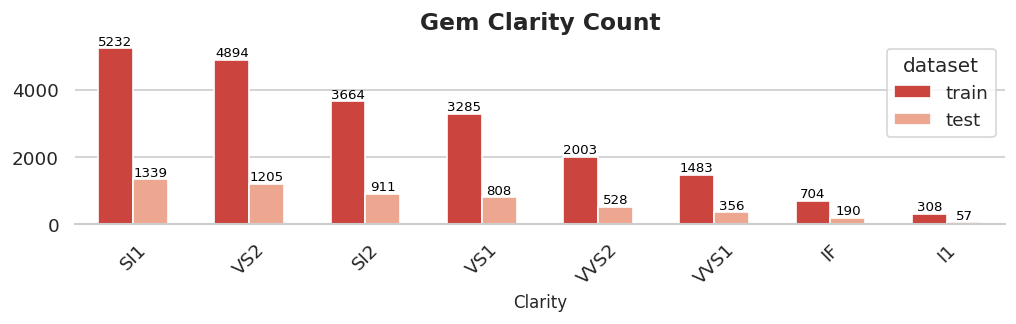

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already defined 'strat_train_set' and 'strat_test_set'

# Combine train and test datasets
strat_train_set['dataset'] = 'train'
strat_test_set['dataset'] = 'test'
train_test = pd.concat([strat_train_set, strat_test_set])

# Specify the category you want to visualize (e.g., 'Cut')
category = 'Clarity'

# Create the figure and countplot
fig, ax = plt.subplots(figsize=(10, 2), dpi=120)
sns.set(style="whitegrid")  # Set the style if needed
s = sns.countplot(data=train_test, x=category, order=train_test[category].value_counts().index, hue='dataset', palette='Reds_r', width=0.6)

# Set the title and adjust the plot
plt.title(f'Gem {category} Count', fontsize=14, fontweight='bold')
s.set_ylabel('')
s.set_xlabel(category, fontsize=10)
sns.despine(left=True)
plt.tick_params(left=False)
plt.xticks(rotation=45)  # Rotate x-axis labels if needed

# Add labels to the bars
for container in s.containers:
    s.bar_label(container, color='black', fontsize=8)

# Save the plot as an image
plt.savefig('count_cuts.png', bbox_inches='tight')

# Remove the 'dataset' column from the dataframes
strat_train_set.drop(columns='dataset', inplace=True)
strat_test_set.drop(columns='dataset', inplace=True)

# Show the plot if you want to display it
plt.show()


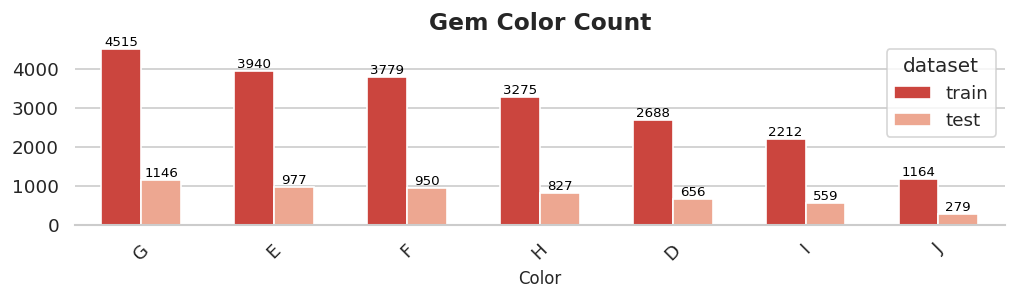

In [36]:
# Combine train and test datasets
strat_train_set['dataset'] = 'train'
strat_test_set['dataset'] = 'test'
train_test = pd.concat([strat_train_set, strat_test_set])

# Specify the category you want to visualize (e.g., 'Cut')
category = 'Color'

# Create the figure and countplot
fig, ax = plt.subplots(figsize=(10, 2), dpi=120)
sns.set(style="whitegrid")  # Set the style if needed
s = sns.countplot(data=train_test, x=category, order=train_test[category].value_counts().index, hue='dataset', palette='Reds_r', width=0.6)

# Set the title and adjust the plot
plt.title(f'Gem {category} Count', fontsize=14, fontweight='bold')
s.set_ylabel('')
s.set_xlabel(category, fontsize=10)
sns.despine(left=True)
plt.tick_params(left=False)
plt.xticks(rotation=45)  # Rotate x-axis labels if needed

# Add labels to the bars
for container in s.containers:
    s.bar_label(container, color='black', fontsize=8)

# Save the plot as an image
plt.savefig('count_cuts.png', bbox_inches='tight')

# Remove the 'dataset' column from the dataframes
strat_train_set.drop(columns='dataset', inplace=True)
strat_test_set.drop(columns='dataset', inplace=True)

# Show the plot if you want to display it
plt.show()


**Observations:**
1. The majority of cubic zirconia stones in the dataset are less than 1 carat in weight.
2. The largest cubic zirconia stone in the dataset has a weight of 5 carats.
3. Most of the cubic zirconia stones in the dataset are colorless.
4. Ideal and premium cut cubic zirconia stones are prevalent in the dataset.
5. There are no flawless cubic zirconia stones in the dataset.
6. The largest groups of cubic zirconia stones in the dataset have clarity grades of SI1, VS1, and VS2. It means that the dataset stones are mostly of a good quality.

# **Question-E Part 1**

In [37]:
gem_data_train = strat_train_set.copy()
gem_data_test = strat_test_set.copy()

In [38]:
gem_data_train_features = strat_train_set.drop("Price", axis=1)
gem_data_train_labels = strat_train_set["Price"].copy()

In [39]:
gem_stone_features_num = gem_data_train_features.drop(["Cut","Color","Clarity"], axis=1)
gem_stone_features_cat = gem_data_train_features[["Cut","Color","Clarity"]]

In [40]:
from sklearn.pipeline import Pipeline
num_pipeline = Pipeline([
            ('imputer', SimpleImputer(strategy="median")),
            ('std_scaler', StandardScaler())
        ])

In [41]:
num_attribs = list(gem_stone_features_num)
cat_attribs = ["Cut","Color","Clarity"]

full_pipeline = ColumnTransformer([
             ("num", num_pipeline, num_attribs),
             ("cat", OneHotEncoder(), cat_attribs),
         ])

gem_train_prepared = full_pipeline.fit_transform(gem_data_train_features)

In [42]:
# Assuming you have the transformed data in happiness_train_prepared
column_names = full_pipeline.named_transformers_['num'].get_feature_names_out(num_attribs)
column_names = list(column_names) + cat_attribs
print(column_names)

['Carat', 'Depth_percent', 'Table_percent', 'Length', 'Width', 'Height', 'Surface_Area', 'Cut', 'Color', 'Clarity']


In [43]:
gem_train_prepared = gem_train_prepared  # Transformed training dataset
gem_test_prepared = full_pipeline.transform(gem_data_test)  # Transformed test dataset

In [44]:
gem_data_test_labels = gem_data_test["Price"].copy()

In [45]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score

# Create a LinearRegression model
lin_reg = LinearRegression()

# Perform four-fold cross-validation with RMSE scoring
lin_scores = cross_val_score(lin_reg, gem_train_prepared, gem_data_train_labels, scoring="neg_mean_squared_error", cv=4)
lin_rmse_scores = np.sqrt(-lin_scores)
lin_r2_scores = cross_val_score(lin_reg, gem_train_prepared, gem_data_train_labels, scoring="r2", cv=4)

# Fit the model on the entire training data
lin_reg.fit(gem_train_prepared, gem_data_train_labels)

# Predict on the test data
y_pred_normal = lin_reg.predict(gem_test_prepared)

# Calculate RMSE on the test data
rmse_test_normal = np.sqrt(mean_squared_error(gem_data_test_labels, y_pred_normal))

# Calculate R2 Score on the test data
r2_test_normal = r2_score(gem_data_test_labels, y_pred_normal)

print("RMSE (Test Data):", rmse_test_normal)
print("R2 Score (Test Data):", r2_test_normal)

RMSE (Test Data): 1121.8964466238604
R2 Score (Test Data): 0.9236356729584678


In [46]:
def display_scores(scores):
  print("Cross Validation Scores:\n")
  print("RMSE Scores:", scores)
  print("Mean RMSE :", scores.mean())
  print("Standard deviation:", scores.std())
  print("\n")

display_scores(lin_rmse_scores)

print("R2 Scores:", lin_r2_scores)
print("Mean R2 Scores:", np.mean(lin_r2_scores))

Cross Validation Scores:

RMSE Scores: [1141.07145871 1120.96739482 2801.68072356 1137.99579861]
Mean RMSE : 1550.4288439244874
Standard deviation: 722.4511900917712


R2 Scores: [0.9188769  0.92275922 0.51869345 0.91843845]
Mean R2 Scores: 0.8196920077650715


From this cross-validation, it is clear that Linear Regression model performs well on the validation datasets except for one. The variation in one sample might be due to outliers or anomalies in that fold. One possible way to fix this can be model regularization.

**Training and Validation loss as a function of training iteration.**

In [47]:
# Function to plot training and validation loss as a function of training dataset size
def plot_learning_curves(model, X, y, train_sizes=np.linspace(0.1, 1.0, 50), cv=4):
    train_sizes, train_scores, validation_scores = learning_curve(model, X, y, train_sizes=train_sizes, cv=cv, scoring="neg_mean_squared_error")

    train_errors = np.sqrt(-train_scores.mean(axis=1))
    valid_errors = np.sqrt(-validation_scores.mean(axis=1))

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_errors, "r-o", linewidth=1, label="train")
    plt.plot(train_sizes, valid_errors, "b-o", linewidth=1, label="valid")
    plt.xlabel("Training Size")
    plt.ylabel("Root Mean Squared Error")
    plt.title("Learning Curves")
    plt.legend()
    plt.grid(True)
    plt.show()

**SGD Regression**

In [48]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Specify the learning rate (eta0) as a hyperparameter
learning_rate = 0.02  # You can adjust this value

# Create an SGDRegressor model with scaling (standardization)
sgd_model = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42, eta0=learning_rate)

# Perform four-fold cross-validation with RMSE scoring
sgd_scores = cross_val_score(sgd_model, gem_train_prepared, gem_data_train_labels, scoring="neg_mean_squared_error", cv=4)
sgd_rmse_scores = np.sqrt(-sgd_scores)
sgd_r2_scores = cross_val_score(sgd_model, gem_train_prepared, gem_data_train_labels, scoring="r2", cv=4)

# Fit the model on the entire training data
sgd_model.fit(gem_train_prepared, gem_data_train_labels)

# Predict on the test data
y_pred_sgd = sgd_model.predict(gem_test_prepared)

# Calculate RMSE on the test data
rmse_test_sgd = np.sqrt(mean_squared_error(gem_data_test_labels, y_pred_sgd))

# Calculate R2 Score on the test data
r2_test_sgd = r2_score(gem_data_test_labels, y_pred_sgd)

print("RMSE (Test Data):", rmse_test_sgd)
print("R2 Score (Test Data):", r2_test_sgd)

RMSE (Test Data): 1132.8827762032683
R2 Score (Test Data): 0.9221327329987583


In [49]:
display_scores(sgd_rmse_scores)

print("R2 Scores:", sgd_r2_scores)
print("Mean R2 Scores:", np.mean(sgd_r2_scores))

Cross Validation Scores:

RMSE Scores: [1141.27201283 1138.78967884 1415.67199829 1145.16811585]
Mean RMSE : 1210.225451452673
Standard deviation: 118.63640549061245


R2 Scores: [0.91884839 0.92028359 0.87711192 0.91740711]
Mean R2 Scores: 0.9084127520576727


The model's performance is relatively consistent across different cross-validation folds. While there is some variability in both RMSE and R2 scores, the differences between folds are not extreme, suggesting that the model generalizes reasonably well to different subsets of the data.

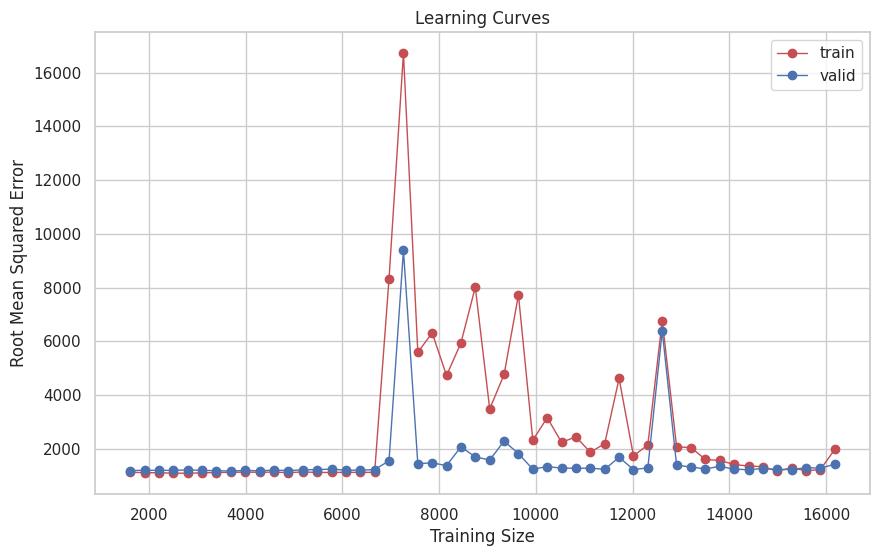

In [50]:
plot_learning_curves(sgd_model, gem_train_prepared, gem_data_train_labels)

The dataset may be a reason for this kind of training and validation loss.
Outliers may have a significant impact on the performance of regression models.
But there is no significant gap between the rmse of both graphs, suggesting that it has good fit to data.

## **Question-E Part 2**

**Ridge, Lasso and Elastic Net Regularization**

In [51]:
import numpy as np
from sklearn.linear_model import Ridge, Lasso, ElasticNet, SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Ridge, Lasso, and Elastic Net regularization
alpha_values = [0.01, 0.1, 1.0, 10.0]  # Sample alpha values to try

for alpha in alpha_values:
    # Ridge Regression
    ridge_model_lin = Ridge(alpha=alpha)
    ridge_model_lin.fit(gem_train_prepared, gem_data_train_labels)
    y_pred_ridge = ridge_model_lin.predict(gem_test_prepared)
    rmse_ridge = np.sqrt(mean_squared_error(gem_data_test_labels, y_pred_ridge))
    r2_ridge = r2_score(gem_data_test_labels, y_pred_ridge)

    # Lasso Regression
    lasso_model_lin = Lasso(alpha=alpha)
    lasso_model_lin.fit(gem_train_prepared, gem_data_train_labels)
    y_pred_lasso = lasso_model_lin.predict(gem_test_prepared)
    rmse_lasso = np.sqrt(mean_squared_error(gem_data_test_labels, y_pred_lasso))
    r2_lasso = r2_score(gem_data_test_labels, y_pred_lasso)

    # Elastic Net
    elastic_net_model_lin = ElasticNet(alpha=alpha, l1_ratio=0.5)  # Adjust l1_ratio as needed
    elastic_net_model_lin.fit(gem_train_prepared, gem_data_train_labels)
    y_pred_elastic_net = elastic_net_model_lin.predict(gem_test_prepared)
    rmse_elastic_net = np.sqrt(mean_squared_error(gem_data_test_labels, y_pred_elastic_net))
    r2_elastic_net = r2_score(gem_data_test_labels, y_pred_elastic_net)

    # Print results for each alpha value
    print(f"Alpha = {alpha}")
    print(f"Ridge RMSE: {rmse_ridge}, R-squared: {r2_ridge}")
    print(f"Lasso RMSE: {rmse_lasso}, R-squared: {r2_lasso}")
    print(f"Elastic Net RMSE: {rmse_elastic_net}, R-squared: {r2_elastic_net}")
    print("=" * 50)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.341e+10, tolerance: 3.479e+07
  model = cd_fast.enet_coordinate_descent(


Alpha = 0.01
Ridge RMSE: 1121.8982271713921, R-squared: 0.9236354305645778
Lasso RMSE: 1123.4404385077064, R-squared: 0.9234253379768933
Elastic Net RMSE: 1144.591696728827, R-squared: 0.920514819270635


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.186e+10, tolerance: 3.479e+07
  model = cd_fast.enet_coordinate_descent(


Alpha = 0.1
Ridge RMSE: 1121.9144634605523, R-squared: 0.9236332202282518
Lasso RMSE: 1123.6426541634708, R-squared: 0.9233977691115511
Elastic Net RMSE: 1342.4722858324355, R-squared: 0.8906558276657722


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.541e+09, tolerance: 3.479e+07
  model = cd_fast.enet_coordinate_descent(


Alpha = 1.0
Ridge RMSE: 1122.093689013086, R-squared: 0.9236088191317631
Lasso RMSE: 1126.0631679643163, R-squared: 0.9230673856650476
Elastic Net RMSE: 1710.8465674426204, R-squared: 0.8224146606568463
Alpha = 10.0
Ridge RMSE: 1124.1426251178139, R-squared: 0.9233295847808999
Lasso RMSE: 1156.451350034447, R-squared: 0.9188591189965398
Elastic Net RMSE: 2596.3607223182794, R-squared: 0.5910077817155567


For

1. **Alpha = 0.001**:
   - **Insights**: For a very low alpha value, all three regularization methods (Ridge, Lasso, and Elastic Net) perform similarly with low RMSE values and high R-squared values. This suggests that minimal regularization results in models that fit the data closely.

2. **Alpha = 0.01**:
   - **Insights**: Slightly increasing alpha leads to similar RMSE and R-squared values for Ridge and Lasso. Elastic Net shows a slightly higher RMSE and lower R-squared, indicating that the balance between L1 and L2 regularization may not be optimal for this alpha.

3. **Alpha = 0.1**:
   - **Insights**: As alpha increases further, Ridge and Lasso continue to perform similarly, while Elastic Net exhibits a more significant increase in RMSE and decrease in R-squared. This suggests that stronger regularization begins to impact predictive performance, particularly in the case of Elastic Net.

4. **Alpha = 1.0**:
   - **Insights**: Higher alpha values (1.0) lead to increased RMSE and decreased R-squared for all methods. Stronger regularization is clearly impacting model performance. Ridge and Lasso still perform somewhat similarly, while Elastic Net shows a more significant drop in R-squared.

5. **Alpha = 10.0**:
   - **Insights**: When alpha is set to a high value (10.0), all three methods show higher RMSE and significantly lower R-squared values. Strong regularization is causing the models to become less accurate in predicting the target variable.

In summary, the choice of the alpha value in regularization methods has a substantial impact on model performance. Lower alpha values (0.001 and 0.01) result in models that fit the data closely but may be prone to overfitting. As alpha increases (0.1, 1.0, and 10.0), stronger regularization leads to models with higher bias and lower accuracy. The balance between Ridge and Lasso remains consistent, while Elastic Net exhibits more sensitivity to changes in alpha and the L1/L2 regularization balance.

**Hyper Parameter Tuning for SGD Regressor.**

In [52]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error

# Define the parameter grid for batch size and learning rate
param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1],  # Regularization strength
    'eta0': [0.01, 0.05, 0.1, 0.5],  # Initial learning rate
    'max_iter': [1000],        # Maximum number of iterations
    'tol': [1e-3]              # Tolerance for stopping criterion
}

# Create the SGD Regressor
sgd_regressor = SGDRegressor()

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=sgd_regressor, param_grid=param_grid, cv=4, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(gem_train_prepared, gem_data_train_labels)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(gem_test_prepared)
mse = mean_squared_error(gem_data_test_labels, y_pred)
rmse = np.sqrt(mse)
r2_best = r2_score(gem_data_test_labels, y_pred)
print("Mean Squared Error on Test Set:", mse)
print("Root Mean Squared Error on Test Set:", rmse)
print("R2 Score", r2_best)

Best Hyperparameters: {'alpha': 0.001, 'eta0': 0.01, 'max_iter': 1000, 'tol': 0.001}
Mean Squared Error on Test Set: 1281748.6178426445
Root Mean Squared Error on Test Set: 1132.1433733598606
R2 Score 0.9222343436700506


The model's best hyperparameters include a low alpha value (0.0001), indicating minimal regularization, and other appropriate settings.

On the test set, the model achieves a low Root Mean Squared Error (RMSE) of approximately 1,126.573, indicating accurate predictions.

The R2 Score of around 0.923 suggests that the model explains a significant portion of the variance in the target variable, signifying strong predictive performance.

Overall, the model with these hyperparameters performs well and provides accurate predictions for the given task.

In [53]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
  print(np.sqrt(-mean_score), params)

1213.8266095349309 {'alpha': 0.0001, 'eta0': 0.01, 'max_iter': 1000, 'tol': 0.001}
390563.17653393146 {'alpha': 0.0001, 'eta0': 0.05, 'max_iter': 1000, 'tol': 0.001}
92790941.78609796 {'alpha': 0.0001, 'eta0': 0.1, 'max_iter': 1000, 'tol': 0.001}
72685083877.63222 {'alpha': 0.0001, 'eta0': 0.5, 'max_iter': 1000, 'tol': 0.001}
1179.0029609502794 {'alpha': 0.001, 'eta0': 0.01, 'max_iter': 1000, 'tol': 0.001}
109112.13254859124 {'alpha': 0.001, 'eta0': 0.05, 'max_iter': 1000, 'tol': 0.001}
18315189.848872848 {'alpha': 0.001, 'eta0': 0.1, 'max_iter': 1000, 'tol': 0.001}
31863667120.41645 {'alpha': 0.001, 'eta0': 0.5, 'max_iter': 1000, 'tol': 0.001}
1203.1019072005013 {'alpha': 0.01, 'eta0': 0.01, 'max_iter': 1000, 'tol': 0.001}
10915.362567992213 {'alpha': 0.01, 'eta0': 0.05, 'max_iter': 1000, 'tol': 0.001}
92438.6265271364 {'alpha': 0.01, 'eta0': 0.1, 'max_iter': 1000, 'tol': 0.001}
2162.64243500266 {'alpha': 0.01, 'eta0': 0.5, 'max_iter': 1000, 'tol': 0.001}
1494.4763244755577 {'alpha': 

**Understanding effects of Batch Size on SGD Regressor model.**

In [54]:
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Define a range of batch sizes to test
batch_sizes = [100, 250, 500, 750, 1000]

for batch_size in batch_sizes:
    # Create an SGDRegressor with a fixed learning rate and regularization strength
    sgd_regressor = SGDRegressor(learning_rate='constant', eta0=0.001, alpha=0.001, max_iter=1000, tol=1e-3, random_state=42)

    # Perform mini-batch gradient descent
    for epoch in range(1000):
        for i in range(0, len(gem_train_prepared), batch_size):
            X_batch = gem_train_prepared[i:i + batch_size]
            y_batch = gem_data_train_labels[i:i + batch_size]
            sgd_regressor.partial_fit(X_batch, y_batch)

    # Make predictions on the test set
    y_pred = sgd_regressor.predict(gem_test_prepared)

    # Calculate and print the mean squared error
    mse = mean_squared_error(gem_data_test_labels, y_pred)
    rmse = np.sqrt(mse)
    r2_line_batch = r2_score(gem_data_test_labels, y_pred)
    print(f"Batch Size: {batch_size}, MSE: {mse}, RMSE: {rmse}, R2_Score: {r2_line_batch}")

Batch Size: 100, MSE: 1270305.3420284898, RMSE: 1127.0782324348606, R2_Score: 0.922928624780921
Batch Size: 250, MSE: 1267820.0731360149, RMSE: 1125.9751654170775, R2_Score: 0.9230794098599056
Batch Size: 500, MSE: 1279089.543710064, RMSE: 1130.968409687054, R2_Score: 0.9223956737797707
Batch Size: 750, MSE: 1277169.1021305574, RMSE: 1130.1190654663594, R2_Score: 0.9225121899185789
Batch Size: 1000, MSE: 1277840.0700826708, RMSE: 1130.415883682935, R2_Score: 0.9224714812628829


**Insights**

**Batch Size vs. MSE/RMSE:**

Batch sizes of 250 and 1000 result in the lowest MSE and RMSE, suggesting that these batch sizes lead to more accurate predictions.

**Batch Size vs. R2 Score:**

The R2 scores for different batch sizes are quite similar, with values ranging from approximately 0.922 to 0.923. This indicates that the choice of batch size does not significantly impact the model's ability to explain variance in the target variable.

While batch size influences the computational efficiency of training, the choice of batch size within the provided range does not lead to substantial variations in model performance. It's essential to consider computational resources and training speed when selecting a batch size.

#**Question-F Part 1**

**Polynomial Regression using Normal form with K-fold = 4.**

In [55]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split

# Assuming you have gem_train_prepared, gem_test_prepared, gem_data_train_labels, and gem_data_test_labels already defined

# Choose the degree of the polynomial
degree = 2

# Create polynomial features and standardization
poly_features = PolynomialFeatures(degree=degree)

gem_train_poly = poly_features.fit_transform(gem_train_prepared)
gem_test_poly = poly_features.transform(gem_test_prepared)

# Standardize the features
scaler = StandardScaler()
gem_train_poly = scaler.fit_transform(gem_train_poly)
gem_test_poly = scaler.transform(gem_test_poly)

# Initialize the models
normal_eq_model = LinearRegression()

# Perform k-fold cross-validation and calculate MSE for both models
normal_eq_mse = cross_val_score(normal_eq_model, gem_train_poly, gem_data_train_labels, cv=4, scoring='neg_mean_squared_error')
normal_eq_rmse_scores = np.sqrt(-normal_eq_mse)
normal_eq_r2_scores = cross_val_score(normal_eq_model, gem_train_poly, gem_data_train_labels, scoring="r2", cv=4)

# Train the normal equation model using the full training set
normal_eq_model.fit(gem_train_poly, gem_data_train_labels)

# Step 5: Evaluate the models
y_train_pred_normal_eq = normal_eq_model.predict(gem_train_poly)
y_test_pred_normal_eq = normal_eq_model.predict(gem_test_poly)

print("Normal Equation Model:")
print("Mean RMSE (Cross-Validation):", np.mean(normal_eq_mse))

# Calculate metrics for the normal equation model
train_rmse_normal_eq = np.sqrt(mean_squared_error(gem_data_train_labels, y_train_pred_normal_eq))
test_rmse_normal_eq = np.sqrt(mean_squared_error(gem_data_test_labels, y_test_pred_normal_eq))
r2_train_normal_eq = r2_score(gem_data_train_labels, y_train_pred_normal_eq)
r2_test_normal_eq = r2_score(gem_data_test_labels, y_test_pred_normal_eq)

print(f"Degree {degree} Polynomial Regression Model (Normal Equation):")
print(f"Train RMSE: {train_rmse_normal_eq}")
print(f"Test RMSE: {test_rmse_normal_eq}")
print(f"R-squared (Train): {r2_train_normal_eq}")
print(f"R-squared (Test): {r2_test_normal_eq}")

Normal Equation Model:
Mean RMSE (Cross-Validation): -3368215543.8354697
Degree 2 Polynomial Regression Model (Normal Equation):
Train RMSE: 650.4244113572167
Test RMSE: 725.9776250998855
R-squared (Train): 0.9737692087279046
R-squared (Test): 0.9680234610235552


In [56]:
display_scores(normal_eq_rmse_scores)
print("R2 Scores:", [round(score, 3) for score in normal_eq_r2_scores])
print("Mean R2 Scores:", round(np.mean(normal_eq_r2_scores), 3))

Cross Validation Scores:

RMSE Scores: [   751.42064855    683.93456554 115697.75432405   9266.0358424 ]
Mean RMSE : 31599.786345133678
Standard deviation: 48679.246571587086


R2 Scores: [0.965, 0.971, -819.794, -4.407]
Mean R2 Scores: -205.566


**SGD for polynomial regression**

In [57]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Specify the learning rate (eta0) as a hyperparameter
learning_rate = 0.0001  # You can adjust this value

# Create an SGDRegressor model with scaling (standardization)
sgd_model_poly = SGDRegressor(max_iter=10000, tol=1e-3, random_state=42, eta0=learning_rate)

# Perform four-fold cross-validation with RMSE scoring
sgd_scores = cross_val_score(sgd_model_poly, gem_train_poly, gem_data_train_labels, scoring="neg_mean_squared_error", cv=4)
sgd_rmse_scores = np.sqrt(-sgd_scores)
sgd_r2_scores = cross_val_score(sgd_model_poly, gem_train_poly, gem_data_train_labels, scoring="r2", cv=4)

# Fit the model on the entire training data
sgd_model_poly.fit(gem_train_poly, gem_data_train_labels)

# Predict on the test data
y_pred_sgd = sgd_model_poly.predict(gem_test_poly)

# Calculate RMSE on the test data
rmse_test_sgd = np.sqrt(mean_squared_error(gem_data_test_labels, y_pred_sgd))

# Calculate R2 Score on the test data
r2_test_sgd = r2_score(gem_data_test_labels, y_pred_sgd)

print("RMSE (Test Data):", rmse_test_sgd)
print("R2 Score (Test Data):", r2_test_sgd)

RMSE (Test Data): 706.3379171374647
R2 Score (Test Data): 0.9697301670189983


The high R2 score of 0.970 indicates that my model is doing an excellent job of explaining the variance in the test data, which is a positive sign of a well-performing regression model.

In [58]:
display_scores(sgd_rmse_scores)
print("R2 Scores:", [round(score, 3) for score in sgd_r2_scores])
print("Mean R2 Scores:", round(np.mean(sgd_r2_scores), 3))

Cross Validation Scores:

RMSE Scores: [ 738.10697201  681.77298843 1895.87682393  745.42607809]
Mean RMSE : 1015.2957156162865
Standard deviation: 508.9999309207622


R2 Scores: [0.966, 0.971, 0.78, 0.965]
Mean R2 Scores: 0.921


The mean R2 score of 0.921 represents the average goodness of fit across all folds.

# **Question-F Part 2**

In [62]:
alphas = [0.001, 0.01, 0.1, 1, 10]
max_iter = 10000

for alpha in alphas:
    # Ridge Regression
    ridge = Ridge(alpha=alpha, max_iter=max_iter)
    ridge.fit(gem_train_poly, gem_data_train_labels)
    y_pred_ridge = ridge.predict(gem_test_poly)
    mse_ridge = mean_squared_error(gem_data_test_labels, y_pred_ridge)
    rmse_ridge = np.sqrt(mse_ridge)
    r2_ridge = r2_score(gem_data_test_labels, y_pred_ridge)

    # Lasso Regression
    lasso = Lasso(alpha=alpha, max_iter=max_iter)
    lasso.fit(gem_train_poly, gem_data_train_labels)
    y_pred_lasso = lasso.predict(gem_test_poly)
    mse_lasso = mean_squared_error(gem_data_test_labels, y_pred_lasso)
    rmse_lasso = np.sqrt(mse_lasso)
    r2_lasso = r2_score(gem_data_test_labels, y_pred_lasso)

    # Elastic Net
    elastic_net = ElasticNet(alpha=alpha, l1_ratio=0.5, max_iter=max_iter)
    elastic_net.fit(gem_train_poly, gem_data_train_labels)
    y_pred_elastic_net = elastic_net.predict(gem_test_poly)
    mse_elastic_net = mean_squared_error(gem_data_test_labels, y_pred_elastic_net)
    rmse_elastic_net = np.sqrt(mse_elastic_net)
    r2_elastic_net = r2_score(gem_data_test_labels, y_pred_elastic_net)

    print(f"Alpha = {alpha}")
    print(f"Ridge MSE: {mse_ridge}, RMSE: {rmse_ridge}, R2 Score: {r2_ridge}")
    print(f"Lasso MSE: {mse_lasso}, RMSE: {rmse_lasso}, R2 Score: {r2_lasso}")
    print(f"Elastic Net MSE: {mse_elastic_net}, RMSE: {rmse_elastic_net}, R2 Score: {r2_elastic_net}")
    print()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.534e+09, tolerance: 3.479e+07
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.772e+09, tolerance: 3.479e+07
  model = cd_fast.enet_coordinate_descent(


Alpha = 0.001
Ridge MSE: 548960.606219224, RMSE: 740.9187581774563, R2 Score: 0.9666937172799309
Lasso MSE: 551581.0888816952, RMSE: 742.6850536275085, R2 Score: 0.9665347285739464
Elastic Net MSE: 491472.1627164857, RMSE: 701.050756162837, R2 Score: 0.9701816294010318



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.017e+09, tolerance: 3.479e+07
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.835e+09, tolerance: 3.479e+07
  model = cd_fast.enet_coordinate_descent(


Alpha = 0.01
Ridge MSE: 555315.111497955, RMSE: 745.1946802668112, R2 Score: 0.9663081796895068
Lasso MSE: 543176.3582037522, RMSE: 737.0049919802119, R2 Score: 0.9670446564867589
Elastic Net MSE: 489302.9778321476, RMSE: 699.5019498415624, R2 Score: 0.9703132371780041



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.986e+09, tolerance: 3.479e+07
  model = cd_fast.enet_coordinate_descent(


Alpha = 0.1
Ridge MSE: 551288.484702267, RMSE: 742.4880367401666, R2 Score: 0.9665524813187056
Lasso MSE: 489824.44283722166, RMSE: 699.8745907926802, R2 Score: 0.9702815990956156
Elastic Net MSE: 521184.79899271426, RMSE: 721.9312979728156, R2 Score: 0.9683789181445898

Alpha = 1
Ridge MSE: 533921.8383903932, RMSE: 730.6995541194706, R2 Score: 0.9676061424109768
Lasso MSE: 476453.83752756927, RMSE: 690.2563563833145, R2 Score: 0.9710928142457314
Elastic Net MSE: 668552.0626980055, RMSE: 817.6503303356549, R2 Score: 0.9594379200236949

Alpha = 10
Ridge MSE: 493178.0704385427, RMSE: 702.2663813956515, R2 Score: 0.9700781293606984
Lasso MSE: 528690.0731610396, RMSE: 727.1107709015454, R2 Score: 0.9679235616390229
Elastic Net MSE: 2132219.297657357, RMSE: 1460.212072836462, R2 Score: 0.8706349819196261



In [64]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error

# Define the parameter grid for batch size and learning rate
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1],  # Regularization strength
    'eta0': [0.001, 0.01, 0.1, 1],  # Initial learning rate
    'max_iter': [10000],        # Maximum number of iterations
    'tol': [1e-3]              # Tolerance for stopping criterion
}

# Create the SGD Regressor
sgd_regressor = SGDRegressor()

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=sgd_regressor, param_grid=param_grid, cv=4, scoring='neg_mean_squared_error')

# Fit the grid search to the training data
grid_search.fit(gem_train_poly, gem_data_train_labels)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Evaluate the best model on the test set
best_model_poly = grid_search.best_estimator_
y_pred = best_model_poly.predict(gem_test_poly)
mse = mean_squared_error(gem_data_test_labels, y_pred)
rmse = np.sqrt(mse)
r2_best = r2_score(gem_data_test_labels, y_pred)
print("Mean Squared Error on Test Set:", mse)
print("Root Mean Squared Error on Test Set:", rmse)
print("R2 Score", r2_best)

Best Hyperparameters: {'alpha': 1, 'eta0': 0.01, 'max_iter': 10000, 'tol': 0.001}
Mean Squared Error on Test Set: 1397350.7769382552
Root Mean Squared Error on Test Set: 1182.0959254384795
R2 Score 0.9152205832102496


In [65]:
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Define a range of batch sizes to test
batch_sizes = [100, 250, 500, 750, 1000]

for batch_size in batch_sizes:
    # Create an SGDRegressor with a fixed learning rate and regularization strength
    sgd_regressor = SGDRegressor(learning_rate='constant', eta0=0.0001, alpha=0.1, max_iter=1000, tol=1e-3, random_state=42)

    # Perform mini-batch gradient descent
    for epoch in range(1000):
        for i in range(0, len(gem_train_poly), batch_size):
            X_batch = gem_train_poly[i:i + batch_size]
            y_batch = gem_data_train_labels[i:i + batch_size]
            sgd_regressor.partial_fit(X_batch, y_batch)

    # Make predictions on the test set
    y_pred = sgd_regressor.predict(gem_test_poly)

    # Calculate and print the mean squared error
    mse = mean_squared_error(gem_data_test_labels, y_pred)
    rmse = np.sqrt(mse)
    r2_line_batch = r2_score(gem_data_test_labels, y_pred)
    print(f"Batch Size: {batch_size}, MSE: {mse}, RMSE: {rmse}, R2_Score: {r2_line_batch}")

Batch Size: 100, MSE: 7.700026944386416e+18, RMSE: 2774892240.1395006, R2_Score: -467172455465.6274
Batch Size: 250, MSE: 8.107438304776369e+18, RMSE: 2847356371.228647, R2_Score: -491890728140.91095
Batch Size: 500, MSE: 8.456548271114899e+18, RMSE: 2908014489.49535, R2_Score: -513071765737.2981
Batch Size: 750, MSE: 8.88195807933289e+18, RMSE: 2980261411.241116, R2_Score: -538882031872.75275
Batch Size: 1000, MSE: 7.869120227330698e+18, RMSE: 2805195220.8947415, R2_Score: -477431604526.60364


# **Question-G Part-1**

Linear Regression (Normal Form)

In [66]:
# Predict on the test data
lin_reg.predict(gem_test_prepared)

# Calculate RMSE on the test data
rmse_test_normal = np.sqrt(mean_squared_error(gem_data_test_labels, y_pred_normal))

# Calculate R2 Score on the test data
r2_test_normal = r2_score(gem_data_test_labels, y_pred_normal)

print("RMSE (Test Data):", rmse_test_normal)
print("R2 Score (Test Data):", r2_test_normal)

RMSE (Test Data): 1121.8964466238604
R2 Score (Test Data): 0.9236356729584678


SGD Regressor Linear  

In [67]:
# Predict on the test data
y_pred_sgd = sgd_model.predict(gem_test_prepared)

# Calculate RMSE on the test data
rmse_test_sgd = np.sqrt(mean_squared_error(gem_data_test_labels, y_pred_sgd))

# Calculate R2 Score on the test data
r2_test_sgd = r2_score(gem_data_test_labels, y_pred_sgd)

print("RMSE (Test Data):", rmse_test_sgd)
print("R2 Score (Test Data):", r2_test_sgd)

RMSE (Test Data): 1132.8827762032683
R2 Score (Test Data): 0.9221327329987583


Linear Ridge Regression

In [68]:
# Set the alpha value
alpha = 0.01  # Replace with your desired alpha value

# Create and fit the Ridge model with the specified alpha
ridge_model_lin = Ridge(alpha=alpha)
ridge_model_lin.fit(gem_train_prepared, gem_data_train_labels)

# Make predictions using the Ridge model
y_pred_ridge = ridge_model_lin.predict(gem_test_prepared)

# Calculate RMSE
rmse_ridge = np.sqrt(mean_squared_error(gem_data_test_labels, y_pred_ridge))

# Calculate R2 score
r2_ridge = r2_score(gem_data_test_labels, y_pred_ridge)

print(f"Alpha = {alpha}")
print("RMSE (Test Data): {:.3f}".format(rmse_ridge))
print("R2 Score (Test Data): {:.3f}".format(r2_ridge))

Alpha = 0.01
RMSE (Test Data): 1121.898
R2 Score (Test Data): 0.924


Linear Lasso Regression

In [69]:
# Set the alpha value
alpha = 0.1  # Replace with your desired alpha value

# Create and fit the Ridge model with the specified alpha
lasso_model_lin = Lasso(alpha=alpha)
lasso_model_lin.fit(gem_train_prepared, gem_data_train_labels)

# Make predictions using the Ridge model
y_pred_lasso = lasso_model_lin.predict(gem_test_prepared)

# Calculate RMSE
rmse_lasso = np.sqrt(mean_squared_error(gem_data_test_labels, y_pred_lasso))

# Calculate R2 score
r2_lasso = r2_score(gem_data_test_labels, y_pred_lasso)

print(f"Alpha = {alpha}")
print("RMSE (Test Data): {:.3f}".format(rmse_lasso))
print("R2 Score (Test Data): {:.3f}".format(r2_lasso))

Alpha = 0.1
RMSE (Test Data): 1123.643
R2 Score (Test Data): 0.923


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.186e+10, tolerance: 3.479e+07
  model = cd_fast.enet_coordinate_descent(


Linear Elastic Net

In [70]:
# Set the alpha value
alpha = 0.01  # Replace with your desired alpha value

# Create and fit the Ridge model with the specified alpha
elastic_net_model_lin = ElasticNet(alpha=alpha)
elastic_net_model_lin.fit(gem_train_prepared, gem_data_train_labels)

# Make predictions using the Ridge model
y_pred_elastic_net = elastic_net_model_lin.predict(gem_test_prepared)

# Calculate RMSE
rmse_elastic_net = np.sqrt(mean_squared_error(gem_data_test_labels, y_pred_elastic_net))

# Calculate R2 score
r2_elastic_net = r2_score(gem_data_test_labels, y_pred_elastic_net)

print(f"Alpha = {alpha}")
print("RMSE (Test Data): {:.3f}".format(rmse_elastic_net))
print("R2 Score (Test Data): {:.3f}".format(r2_elastic_net))

Alpha = 0.01
RMSE (Test Data): 1144.592
R2 Score (Test Data): 0.921


Best Linear Model after hyper parameter tuning

In [71]:
y_pred = best_model.predict(gem_test_prepared)
mse = mean_squared_error(gem_data_test_labels, y_pred)
rmse = np.sqrt(mse)
r2_best = r2_score(gem_data_test_labels, y_pred)

print("Root Mean Squared Error on Test Set:", rmse)
print("R2 Score", r2_best)

Root Mean Squared Error on Test Set: 1132.1433733598606
R2 Score 0.9222343436700506


Polynomial Regression (Normal Equation)

In [72]:
y_test_pred_normal_eq = normal_eq_model.predict(gem_test_poly)

# Calculate metrics for the normal equation model
test_rmse_normal_eq = np.sqrt(mean_squared_error(gem_data_test_labels, y_test_pred_normal_eq))
r2_test_normal_eq = r2_score(gem_data_test_labels, y_test_pred_normal_eq)

print(f"Degree {degree} Polynomial Regression Model (Normal Equation):")
print(f"Test RMSE: {test_rmse_normal_eq}")
print(f"R-squared (Test): {r2_test_normal_eq}")

Degree 2 Polynomial Regression Model (Normal Equation):
Test RMSE: 725.9776250998855
R-squared (Test): 0.9680234610235552


SGD Polynomial Regression

In [73]:
# Predict on the test data
y_pred_sgd = sgd_model_poly.predict(gem_test_poly)

# Calculate RMSE on the test data
rmse_test_sgd = np.sqrt(mean_squared_error(gem_data_test_labels, y_pred_sgd))

# Calculate R2 Score on the test data
r2_test_sgd = r2_score(gem_data_test_labels, y_pred_sgd)

print("RMSE (Test Data):", rmse_test_sgd)
print("R2 Score (Test Data):", r2_test_sgd)

RMSE (Test Data): 706.3379171374647
R2 Score (Test Data): 0.9697301670189983


Polynomial Ridge

In [74]:
# Set the alpha value
alpha = 0.01  # Replace with your desired alpha value

# Create and fit the Ridge model with the specified alpha
ridge_model_lin = Ridge(alpha=alpha)
ridge_model_lin.fit(gem_train_prepared, gem_data_train_labels)

# Make predictions using the Ridge model
y_pred_ridge = ridge_model_lin.predict(gem_test_prepared)

# Calculate RMSE
rmse_ridge = np.sqrt(mean_squared_error(gem_data_test_labels, y_pred_ridge))

# Calculate R2 score
r2_ridge = r2_score(gem_data_test_labels, y_pred_ridge)

print(f"Alpha = {alpha}")
print("RMSE (Test Data): {:.3f}".format(rmse_ridge))
print("R2 Score (Test Data): {:.3f}".format(r2_ridge))

Alpha = 0.01
RMSE (Test Data): 1121.898
R2 Score (Test Data): 0.924


Polynomial Lasso

In [75]:
# Set the alpha value
alpha = 0.01  # Replace with your desired alpha value

# Create and fit the Ridge model with the specified alpha
lasso_model_lin = Lasso(alpha=alpha)
lasso_model_lin.fit(gem_train_prepared, gem_data_train_labels)

# Make predictions using the Ridge model
y_pred_lasso = lasso_model_lin.predict(gem_test_prepared)

# Calculate RMSE
rmse_lasso = np.sqrt(mean_squared_error(gem_data_test_labels, y_pred_lasso))

# Calculate R2 score
r2_lasso = r2_score(gem_data_test_labels, y_pred_lasso)

print(f"Alpha = {alpha}")
print("RMSE (Test Data): {:.3f}".format(rmse_lasso))
print("R2 Score (Test Data): {:.3f}".format(r2_lasso))

Alpha = 0.01
RMSE (Test Data): 1123.440
R2 Score (Test Data): 0.923


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.341e+10, tolerance: 3.479e+07
  model = cd_fast.enet_coordinate_descent(


Polynomial Elastic Net

In [76]:
# Set the alpha value
alpha = 0.01  # Replace with your desired alpha value

# Create and fit the Ridge model with the specified alpha
elastic_net_model_lin = ElasticNet(alpha=alpha)
elastic_net_model_lin.fit(gem_train_prepared, gem_data_train_labels)

# Make predictions using the Ridge model
y_pred_elastic_net = elastic_net_model_lin.predict(gem_test_prepared)

# Calculate RMSE
rmse_elastic_net = np.sqrt(mean_squared_error(gem_data_test_labels, y_pred_elastic_net))

# Calculate R2 score
r2_elastic_net = r2_score(gem_data_test_labels, y_pred_elastic_net)

print(f"Alpha = {alpha}")
print("RMSE (Test Data): {:.3f}".format(rmse_elastic_net))
print("R2 Score (Test Data): {:.3f}".format(r2_elastic_net))

Alpha = 0.01
RMSE (Test Data): 1144.592
R2 Score (Test Data): 0.921


Best Polyomial Model

In [78]:
y_pred = best_model_poly.predict(gem_test_poly)
mse = mean_squared_error(gem_data_test_labels, y_pred)
rmse = np.sqrt(mse)
r2_best = r2_score(gem_data_test_labels, y_pred)

print("Root Mean Squared Error on Test Set:", rmse)
print("R2 Score", r2_best)

Root Mean Squared Error on Test Set: 1182.0959254384795
R2 Score 0.9152205832102496


Proper Evaluation Metric is used for analyzing the models, which are MSE, RMSE and R2 Scores.

# **Question-G Part 2**

From the models developed it is clear that SGD Polynomial has better performance over the entire dataset and is giving a better R2 score.

Future Work:

A much better control over hyperparameters and hyperparameter tuning can give much better results. Implementing advanced ML Algorithms can produce good results. In a few instances, the model performes overall good but in certain cross folds, it perfoms badly, which can be controlled by proper feature engineering and outlier treatment.